# Домашнее задание 5. Градиентный спуск. (10 баллов + 2.5 бонус)

### Мосалев Максим Сергеевич ИАД-7

В этом домашнем задании вы напишете градиентный спуск для линейной регрессии, а так же посмотрите, как он ведёт себя с разными параметрами и разными функциями потерь.

Правила:

* Домашнее задание оценивается в 10 баллов.

* Можно использовать без доказательства любые результаты, встречавшиеся на лекциях или семинарах по курсу, если получение этих результатов не является вопросом задания.

* Можно использовать любые свободные источники с *обязательным* указанием ссылки на них.

* Плагиат не допускается. При обнаружении случаев списывания, 0 за работу выставляется всем участникам нарушения, даже если можно установить, кто у кого списал.

* Старайтесь сделать код как можно более оптимальным. В частности, будет штрафоваться использование циклов в тех случаях, когда операцию можно совершить при помощи инструментов библиотек, о которых рассказывалось в курсе.  

In [1]:
from typing import Iterable, List

import matplotlib.pyplot as plt
import numpy as np

## Часть 1. Градиентный спуск (5 баллов)

Для начала давайте вспомним самый простой функционал ошибки, который мы применяем в задаче регрессии — Mean Squared Error:

$$
Q(w, X, y) = \frac{1}{\ell} \sum\limits_{i=1}^\ell (\langle x_i, w \rangle - y_i)^2
$$

где $x_i$ — это $i$-ый объект датасета, $y_i$ — правильный ответ для $i$-го объекта, а $w$ — веса нашей линейной модели.

Как мы помним, для линейной модели, его можно записать в матричном виде вот так:

$$
Q(w, X, y) = \frac{1}{\ell} || Xw - y ||^2
$$

где $X$ — это матрица объекты-признаки, а $y$ — вектор правильных ответов

Для того чтобы воспользоваться методом градиентного спуска, нам нужно посчитать градиент нашего функционала. Для MSE он будет выглядеть так:

$$
\nabla_w Q(w, X, y) = \frac{2}{\ell} X^T(Xw-y)
$$

Ниже приведён базовый класс `BaseLoss`, который мы будем использовать для реализации всех наших лоссов. Менять его не нужно. У него есть два абстрактных метода:
1. Метод `calc_loss`, который будет принимать на вход объекты `x`, правильные ответы `y` и веса `w` и вычислять значения лосса
2. Метод `calc_grad`, который будет принимать на вход объекты `x`, правильные ответы `y` и веса `w` и вычислять значения градиента (вектор)

In [2]:
import abc


class BaseLoss(abc.ABC):
    """Базовый класс лосса"""

    @abc.abstractmethod
    def calc_loss(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> float:
        """
        Функция для вычислений значения лосса
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :return: число -- значения функции потерь
        """
        raise NotImplementedError

    @abc.abstractmethod
    def calc_grad(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> np.ndarray:
        """
        Функция для вычислений градиента лосса по весам w
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :return: np.ndarray размера (n_features,) градиент функции потерь по весам w
        """
        raise NotImplementedError

Теперь давайте напишем реализацию этого абстрактоного класса: Mean Squared Error лосс.

**Задание 1.1 (5/8 балла):** Реализуйте класс `MSELoss`

Он должен вычислять лосс и градиент по формулам наверху

In [3]:
class MSELoss(BaseLoss):
    def calc_loss(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> float:
        """
        Функция для вычислений значения лосса
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :return: число -- значения функции потерь
        """
        n_objects = X.shape[0]
        mse = np.sum((np.dot(X, w) - y) ** 2) / n_objects
        return mse

    def calc_grad(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> np.ndarray:
        """
        Функция для вычислений градиента лосса по весам w
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :return: np.ndarray размера (n_features,) градиент функции потерь по весам w
        """
        n_objects = X.shape[0]
        gradient = 2 * np.dot(X.T, (np.dot(X, w) - y)) / n_objects
        return gradient

Теперь мы можем создать объект `MSELoss` и при помощи него вычислять значение нашей функции потерь и градиенты:

In [4]:
# Создадим объект лосса
loss = MSELoss()

# Создадим какой-то датасет
X = np.arange(200).reshape(20, 10)
y = np.arange(20)

# Создадим какой-то вектор весов
w = np.arange(10)

# Выведем значение лосса и градиента на этом датасете с этим вектором весов
print(loss.calc_loss(X, y, w))
print(loss.calc_grad(X, y, w))

# Проверка, что методы реализованы правильно
assert loss.calc_loss(X, y, w) == 27410283.5, "Метод calc_loss реализован неверно"
assert np.allclose(
    loss.calc_grad(X, y, w),
    np.array(
        [
            1163180.0,
            1172281.0,
            1181382.0,
            1190483.0,
            1199584.0,
            1208685.0,
            1217786.0,
            1226887.0,
            1235988.0,
            1245089.0,
        ]
    ),
), "Метод calc_grad реализован неверно"
print("Всё верно!")

27410283.5
[1163180. 1172281. 1181382. 1190483. 1199584. 1208685. 1217786. 1226887.
 1235988. 1245089.]
Всё верно!


Теперь когда у нас есть всё для вычисления градиента, давайте напишем наш градиентный спуск. Напомним, что формула для одной итерации градиентного спуска выглядит следующим образом:

$$
w^t = w^{t-1} - \eta \nabla_{w} Q(w^{t-1}, X, y)
$$

Где $w^t$ — значение вектора весов на $t$-ой итерации, а $\eta$ — параметр learning rate, отвечающий за размер шага.

**Задание 1.2 (5/8 балла):** Реализуйте функцию `gradient_descent`

Функция должна принимать на вход начальное значение весов линейной модели `w_init`, матрицу объектов-признаков `X`, 
вектор правильных ответов `y`, объект функции потерь `loss`, размер шага `lr` и количество итераций `n_iterations`.

Функция должна реализовывать цикл, в котором происходит шаг градиентного спуска (градиенты берутся из `loss` посредством вызова метода `calc_grad`) по формуле выше и возвращать 
траекторию спуска (список из новых значений весов на каждом шаге)

In [5]:
def gradient_descent(
    w_init: np.ndarray,
    X: np.ndarray,
    y: np.ndarray,
    loss: BaseLoss,
    lr: float,
    n_iterations: int = 100000,
) -> List[np.ndarray]:
    """
    Функция градиентного спуска
    :param w_init: np.ndarray размера (n_feratures,) -- начальное значение вектора весов
    :param X: np.ndarray размера (n_objects, n_features) -- матрица объекты-признаки
    :param y: np.ndarray размера (n_objects,) -- вектор правильных ответов
    :param loss: Объект подкласса BaseLoss, который умеет считать градиенты при помощи loss.calc_grad(X, y, w)
    :param lr: float -- параметр величины шага, на который нужно домножать градиент
    :param n_iterations: int -- сколько итераций делать
    :return: Список из n_iterations объектов np.ndarray размера (n_features,) -- история весов на каждом шаге
    """
    w = w_init
    weights_history = [w.copy()]
    
    for i in range(n_iterations):
        grad = loss.calc_grad(X, y, w)
        w = w - lr * grad
        weights_history.append(w.copy())
    
    return weights_history

Теперь создадим синтетический датасет и функцию, которая будет рисовать траекторию градиентного спуска по истории:

In [70]:
# Создаём датасет из двух переменных и реального вектора зависимости w_true

np.random.seed(1337)

n_features = 2
n_objects = 300
batch_size = 10
num_steps = 43

w_true = np.random.normal(size=(n_features,))

X = np.random.uniform(-5, 5, (n_objects, n_features))
X *= (np.arange(n_features) * 2 + 1)[np.newaxis, :]
y = X.dot(w_true) + np.random.normal(0, 1, (n_objects))
w_init = np.random.uniform(-2, 2, (n_features))

print(X.shape)
print(y.shape)

(300, 2)
(300,)


In [71]:
loss = MSELoss()
w_list = gradient_descent(w_init, X, y, loss, 0.01, 100)
print(loss.calc_loss(X, y, w_list[0]))
print(loss.calc_loss(X, y, w_list[-1]))

425.58917680450253
0.8670644395649493


In [8]:
def plot_gd(w_list: Iterable, X: np.ndarray, y: np.ndarray, loss: BaseLoss):
    """
    Функция для отрисовки траектории градиентного спуска
    :param w_list: Список из объектов np.ndarray размера (n_features,) -- история весов на каждом шаге
    :param X: np.ndarray размера (n_objects, n_features) -- матрица объекты-признаки
    :param y: np.ndarray размера (n_objects,) -- вектор правильных ответов
    :param loss: Объект подкласса BaseLoss, который умеет считать лосс при помощи loss.calc_loss(X, y, w)
    """
    w_list = np.array(w_list)
    meshgrid_space = np.linspace(-2, 2, 100)
    A, B = np.meshgrid(meshgrid_space, meshgrid_space)

    levels = np.empty_like(A)
    for i in range(A.shape[0]):
        for j in range(A.shape[1]):
            w_tmp = np.array([A[i, j], B[i, j]])
            levels[i, j] = loss.calc_loss(X, y, w_tmp)

    plt.figure(figsize=(15, 6))
    plt.title("GD trajectory")
    plt.xlabel(r"$w_1$")
    plt.ylabel(r"$w_2$")
    plt.xlim(w_list[:, 0].min() - 0.1, w_list[:, 0].max() + 0.1)
    plt.ylim(w_list[:, 1].min() - 0.1, w_list[:, 1].max() + 0.1)
    plt.gca().set_aspect("equal")

    # visualize the level set
    CS = plt.contour(
        A, B, levels, levels=np.logspace(0, 1, num=20), cmap=plt.cm.rainbow_r
    )
    CB = plt.colorbar(CS, shrink=0.8, extend="both")

    # visualize trajectory
    plt.scatter(w_list[:, 0], w_list[:, 1])
    plt.plot(w_list[:, 0], w_list[:, 1])

    plt.show()

**Задание 1.3 (5/8 балла):** При помощи функций `gradient_descent` и  `plot_gd` нарисуйте траекторию градиентного спуска для разных значений длины шага (параметра `lr`). Используйте не менее четырёх разных значений для `lr`. 

Сделайте и опишите свои выводы о том, как параметр `lr` влияет на поведение градиентного спуска

Подсказки:
* Функция `gradient_descent` возвращает историю весов, которую нужно подать в функцию `plot_gd`
* Хорошие значения для `lr` могут лежать в промежутке от 0.0001 до 0.1

lr = 0.0001


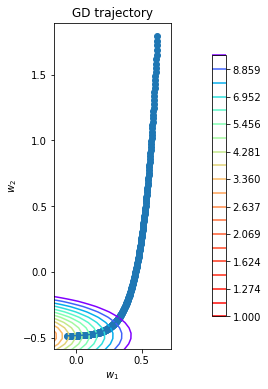

lr = 0.001


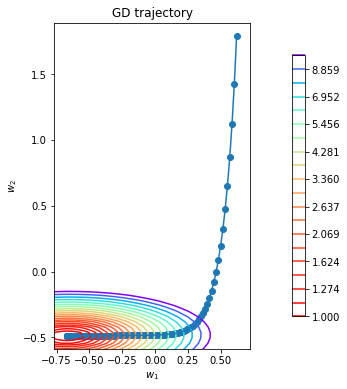

lr = 0.005


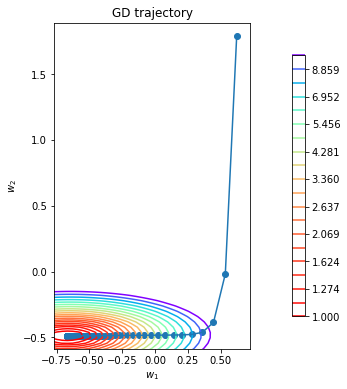

lr = 0.01


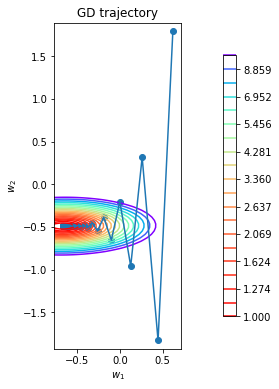

In [9]:
lr_l = [0.0001, 0.001, 0.005, 0.01]
for lr in lr_l: 
    w_list = gradient_descent(w_init, X, y, loss, lr, 500)
    print('lr =', lr)
    plot_gd(w_list, X, y, loss)

Параметр lr - величина шага - очень важен в алгоритме градиентного спуска. Если взять слишком большой размер шага в направлении антиградиента, то это может привести к тому, что алгоритм "перескосчет" минимум и не сойдется. А если взять слишком маленькую величину шага, то это напротив приводит к медленной сходимости и при малом количестве итераций может вообще не достигнуть минимума (например, 1 рисунок при lr = 0.0001 и 500 итераций)

Теперь реализуем стохастический градиентный спуск

**Задание 1.4 (5/8 балла):** Реализуйте функцию `stochastic_gradient_descent`

Функция должна принимать все те же параметры, что и функция `gradient_descent`, но ещё параметр `batch_size`, отвечающий за размер батча. 

Функция должна как и раньше реализовывать цикл, в котором происходит шаг градиентного спуска, но на каждом шаге считать градиент не по всей выборке `X`, а только по случайно выбранной части.

Подсказка: для выбора случайной части можно использовать [`np.random.choice`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.choice.html) с правильным параметром `size`, чтобы выбрать случайные индексы, а потом проиндексировать получившимся массивом массив `X`:
```
batch_indices = np.random.choice(X.shape[0], size=batch_size, replace=False)
batch = X[batch_indices]
```

In [10]:
def stochastic_gradient_descent(
    w_init: np.ndarray,
    X: np.ndarray,
    y: np.ndarray,
    loss: BaseLoss,
    lr: float,
    batch_size: int,
    n_iterations: int = 1000,
) -> List[np.ndarray]:
    """
    Функция градиентного спуска
    :param w_init: np.ndarray размера (n_feratures,) -- начальное значение вектора весов
    :param X: np.ndarray размера (n_objects, n_features) -- матрица объекты-признаки
    :param y: np.ndarray размера (n_objects,) -- вектор правильных ответов
    :param loss: Объект подкласса BaseLoss, который умеет считать градиенты при помощи loss.calc_grad(X, y, w)
    :param lr: float -- параметр величины шага, на который нужно домножать градиент
    :param batch_size: int -- размер подвыборки, которую нужно семплировать на каждом шаге
    :param n_iterations: int -- сколько итераций делать
    :return: Список из n_iterations объектов np.ndarray размера (n_features,) -- история весов на каждом шаге
    """
    w = w_init
    weights_history = [w.copy()]
    n_objects = X.shape[0]

    for i in range(n_iterations):
        # Получаем случайные индексы объектов для формирования батча
        batch_indices = np.random.choice(n_objects, batch_size, replace=False)
        X_batch = X[batch_indices]
        y_batch = y[batch_indices]

        # Вычисляем градиент на батче
        grad = loss.calc_grad(X_batch, y_batch, w)

        # Обновляем веса
        w = w - lr * grad

        # Сохраняем историю весов
        weights_history.append(w.copy())

    return weights_history

**Задание 1.5 (5/8 балла):** При помощи функций `stochastic_gradient_descent` и  `plot_gd` нарисуйте траекторию градиентного спуска для разных значений длины шага (параметра `lr`) и размера подвыборки (параметра `batch_size`). Используйте не менее четырёх разных значений для `lr` и `batch_size`. 

Сделайте и опишите свои выводы о том, как параметры  `lr` и `batch_size` влияют на поведение стохастического градиентного спуска. Как отличается поведение стохастического градиентного спуска от обычного?

Обратите внимание, что в нашем датасете всего 300 объектов, так что `batch_size` больше этого числа не будет иметь смысла.

lr = 0.0001 , batch_size = 3


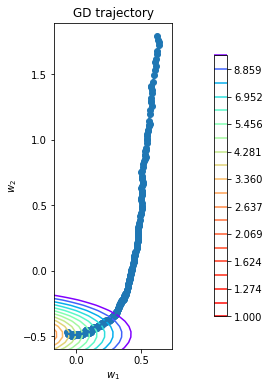

lr = 0.0001 , batch_size = 10


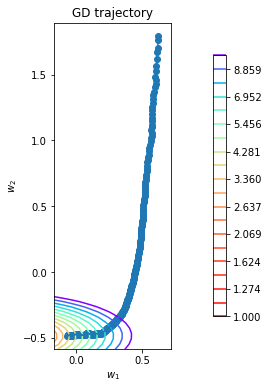

lr = 0.0001 , batch_size = 30


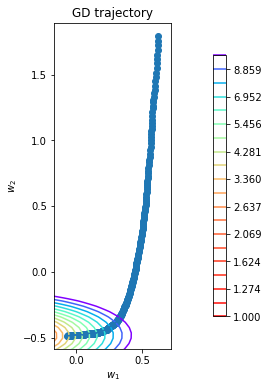

lr = 0.0001 , batch_size = 100


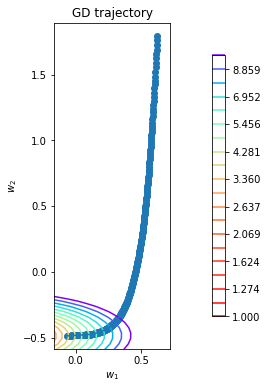

lr = 0.001 , batch_size = 3


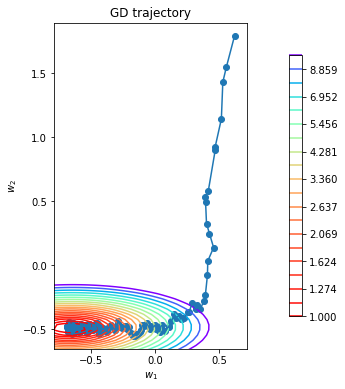

lr = 0.001 , batch_size = 10


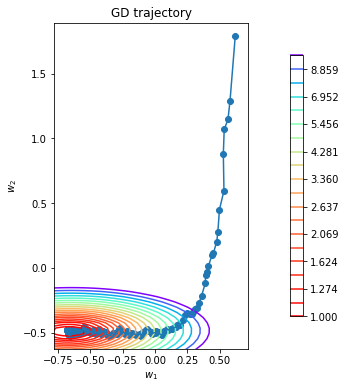

lr = 0.001 , batch_size = 30


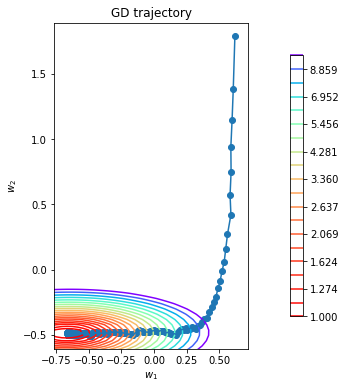

lr = 0.001 , batch_size = 100


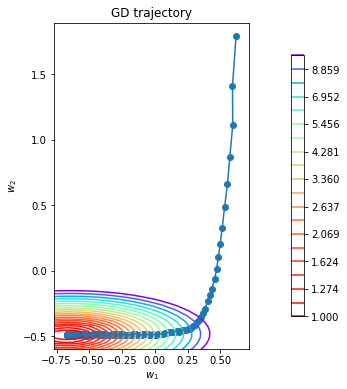

lr = 0.005 , batch_size = 3


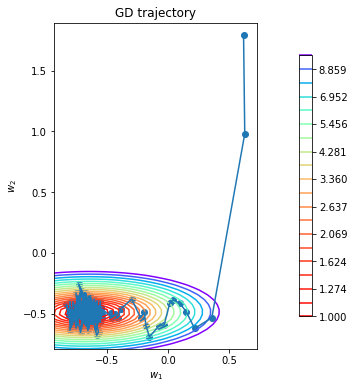

lr = 0.005 , batch_size = 10


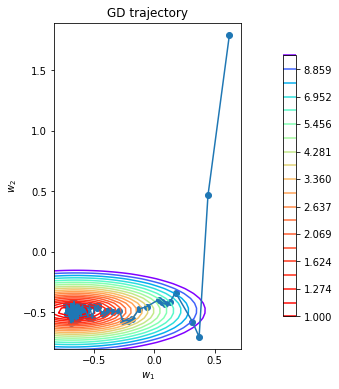

lr = 0.005 , batch_size = 30


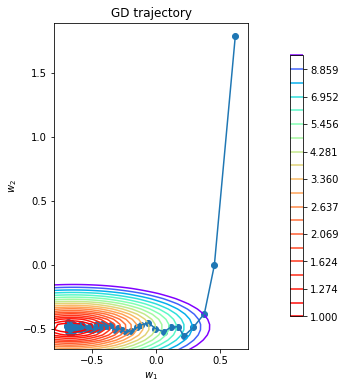

lr = 0.005 , batch_size = 100


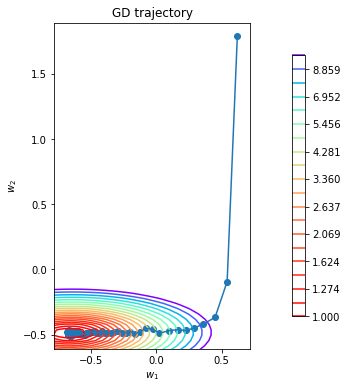

lr = 0.01 , batch_size = 3


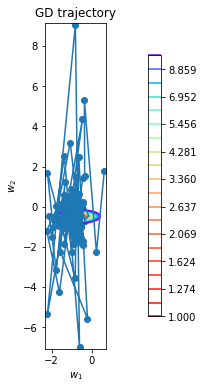

lr = 0.01 , batch_size = 10


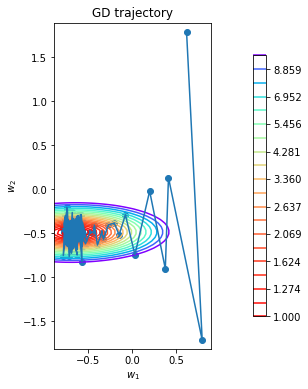

lr = 0.01 , batch_size = 30


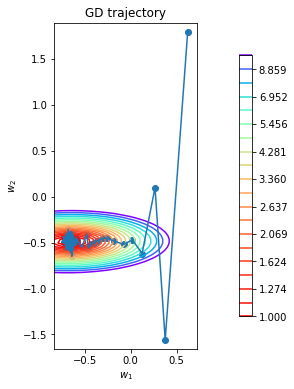

lr = 0.01 , batch_size = 100


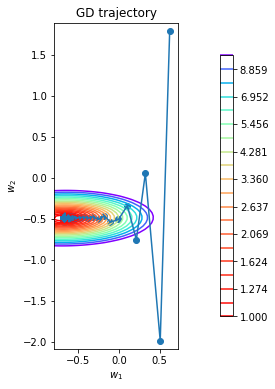

In [11]:
lr_l = [0.0001, 0.001, 0.005, 0.01]
batch_sizes = [3, 10, 30, 100]
for lr in lr_l: 
    for bs in batch_sizes:
        w_list = stochastic_gradient_descent(w_init, X, y, loss, lr, bs, 500)
        print('lr =', lr, ', batch_size =', bs)
        plot_gd(w_list, X, y, loss)

Параметр lr - величина шага - влияет на стохастический градиентный спуска точно также как на обычный градиентный спуск. 

Параметр batch_size определяет количество объектов, используемых для каждого обновления весов в SGD. Маленький batch_size может ускорить обучение, так как градиенты вычисляются на основе меньшего количества данных, однако маленький batch_size также может привести к большой зашумленности и менее стабильному обучению.
При увеличении batch_size улучшается стабильность обучения, но также замедляется обновление весов, то есть замедляется обучение.
В добавок при большом шаге и маленьком batch_size легко проскочить минимум.

Использование SGD может ускорить обучение и позволить быстрее сходиться к локальному минимуму, но его шумный характер может затруднить сходимость к оптимальному решению. Особенно зашумленность проявляется в точках близких к минимуму.  
Обычный градиентный спуск может быть более стабильным и предсказуемым, но может потребовать больше времени для обучения на больших объемах данных.
        





Вы могли заметить, что поведение градиентного спуска, особенно стохастической версии, очень сильно зависит от размера шага. 

Как правило, в начале спуска мы хотим делать большие шаги, чтобы поскорее подойти поближе к минимуму, а позже мы уже хотим делать шаги маленькие, чтобы более точнее этого минимума достичь и не "перепрыгнуть" его. 

Чтобы достичь такого поведения мы можем постепенно уменьшать длину шага с увеличением номера итерации. Сделать это можно, например, вычисляя на каждой итерации длину шага по следующей формуле:

$$
    \eta_t
    =
    \lambda
    \left(
        \frac{s_0}{s_0 + t}
    \right)^p
$$

где $\eta_t$ — длина шага на итерации $t$, $\lambda$ — начальная длина шага (параметр `lr` у нас), $s_0$ и $p$ — настраиваемые параметры.

**Задание 1.6 (5/8 балла):** Реализуйте функцию `stochastic_gradient_descent` на этот раз с затухающим шагом по формуле выше. Параметр $s_0$ возьмите равным 1. Параметр $p$ возьмите из нового аргумента функции `p`.

In [12]:
def stochastic_gradient_descent(
    w_init: np.ndarray,
    X: np.ndarray,
    y: np.ndarray,
    loss: BaseLoss,
    lr: float,
    batch_size: int,
    p: float,
    n_iterations: int = 1000,
) -> List[np.ndarray]:
    """
    Функция градиентного спуска
    :param w_init: np.ndarray размера (n_feratures,) -- начальное значение вектора весов
    :param X: np.ndarray размера (n_objects, n_features) -- матрица объекты-признаки
    :param y: np.ndarray размера (n_objects,) -- вектор правильных ответов
    :param loss: Объект подкласса BaseLoss, который умеет считать градиенты при помощи loss.calc_grad(X, y, w)
    :param lr: float -- параметр величины шага, на который нужно домножать градиент
    :param batch_size: int -- размер подвыборки, которую нужно семплировать на каждом шаге
    :param p: float -- значение степени в формуле затухания длины шага
    :param n_iterations: int -- сколько итераций делать
    :return: Список из n_iterations объектов np.ndarray размера (n_features,) -- история весов на каждом шаге
    """
    w = w_init
    weights_history = [w.copy()]
    n_objects = X.shape[0]

    for t in range(1, n_iterations + 1):
        batch_indices = np.random.choice(n_objects, batch_size, replace=False)
        X_batch = X[batch_indices]
        y_batch = y[batch_indices]

        grad = loss.calc_grad(X_batch, y_batch, w)
        
        s0 = 1
        lr_t = lr * (s0 / (s0 + t)) ** p

        w = w - lr_t * grad
        
        weights_history.append(w.copy())

    return weights_history

**Задание 1.7 (5/8 балла):** При помощи новой функции `stochastic_gradient_descent` и функции `plot_gd` нарисуйте траекторию градиентного спуска для разных значений параметра `p`. Используйте не менее четырёх разных значений для `p`. Хорошими могут быть значения, лежащие в промежутке от 0.1 до 1.
Параметр `lr` возьмите равным 0.01, а параметр `batch_size` равным 10.

Сделайте и опишите свои выводы о том, как параметр `p` влияет на поведение стохастического градиентного спуска

p = 0.1


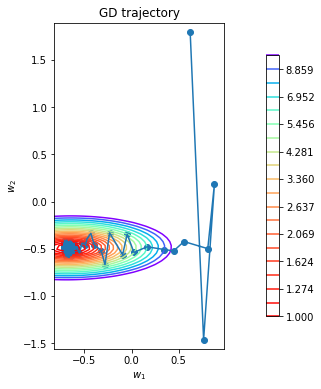

p = 0.3


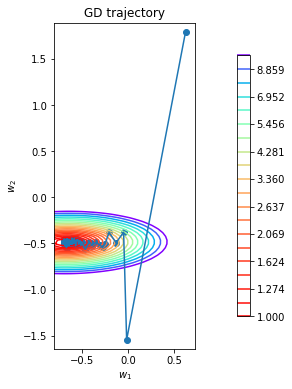

p = 0.5


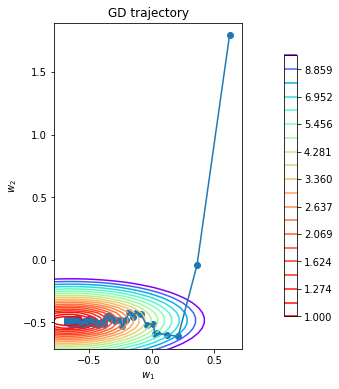

p = 0.6


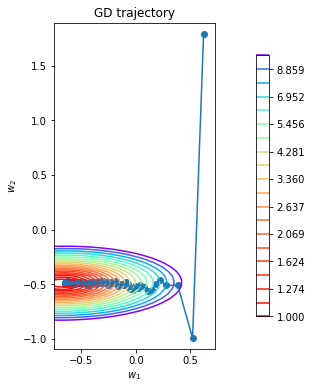

p = 0.9


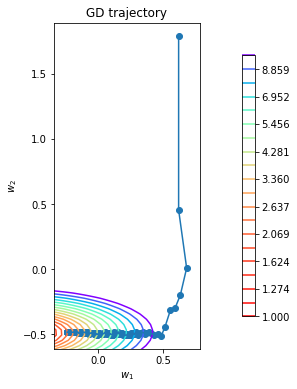

p = 1


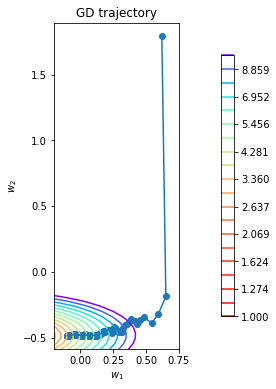

In [13]:
p_l = [0.1, 0.3, 0.5, 0.6, 0.9, 1]
lr = 0.01
batch_size = 10
for p in p_l: 
    w_list = stochastic_gradient_descent(w_init, X, y, loss, lr, batch_size, p, 500)
    print('p =', p)
    plot_gd(w_list, X, y, loss)

Большее значение p приводит к более стабильному обучению, так как величина шага меняется более плавно с увеличением числа итераций. Однако слишком большое значение p может привести к тому, что величина шага обучения станет слишком маленькой, что замедлит обучение и при малом количестве итераций можно вообще не достигнуть минимума.

Важно подобрать такое значение p, которое позволит величине шага уменьшаться достаточно быстро для стабильного обучения, но не слишком быстро, чтобы сохранить достаточную величину шага для сходимости к оптимальному решению.

**Задание 1.8 (5/8 балла):** Сравните сходимость обычного градиентного спуска и стохастичекой версии:
Нарисуйте график зависимости значения лосса (его можно посчитать при помощи метода `calc_loss`, используя $x$ и $y$ из датасета и $w$ с соответствующей итерации) от номера итерации для траекторий, полученных при помощи обычного и стохастического градиентного спуска с одинаковыми параметрами. Параметр `batch_size` возьмите равным 10.

Видно ли на данном графике преимущество SGD? Почему?

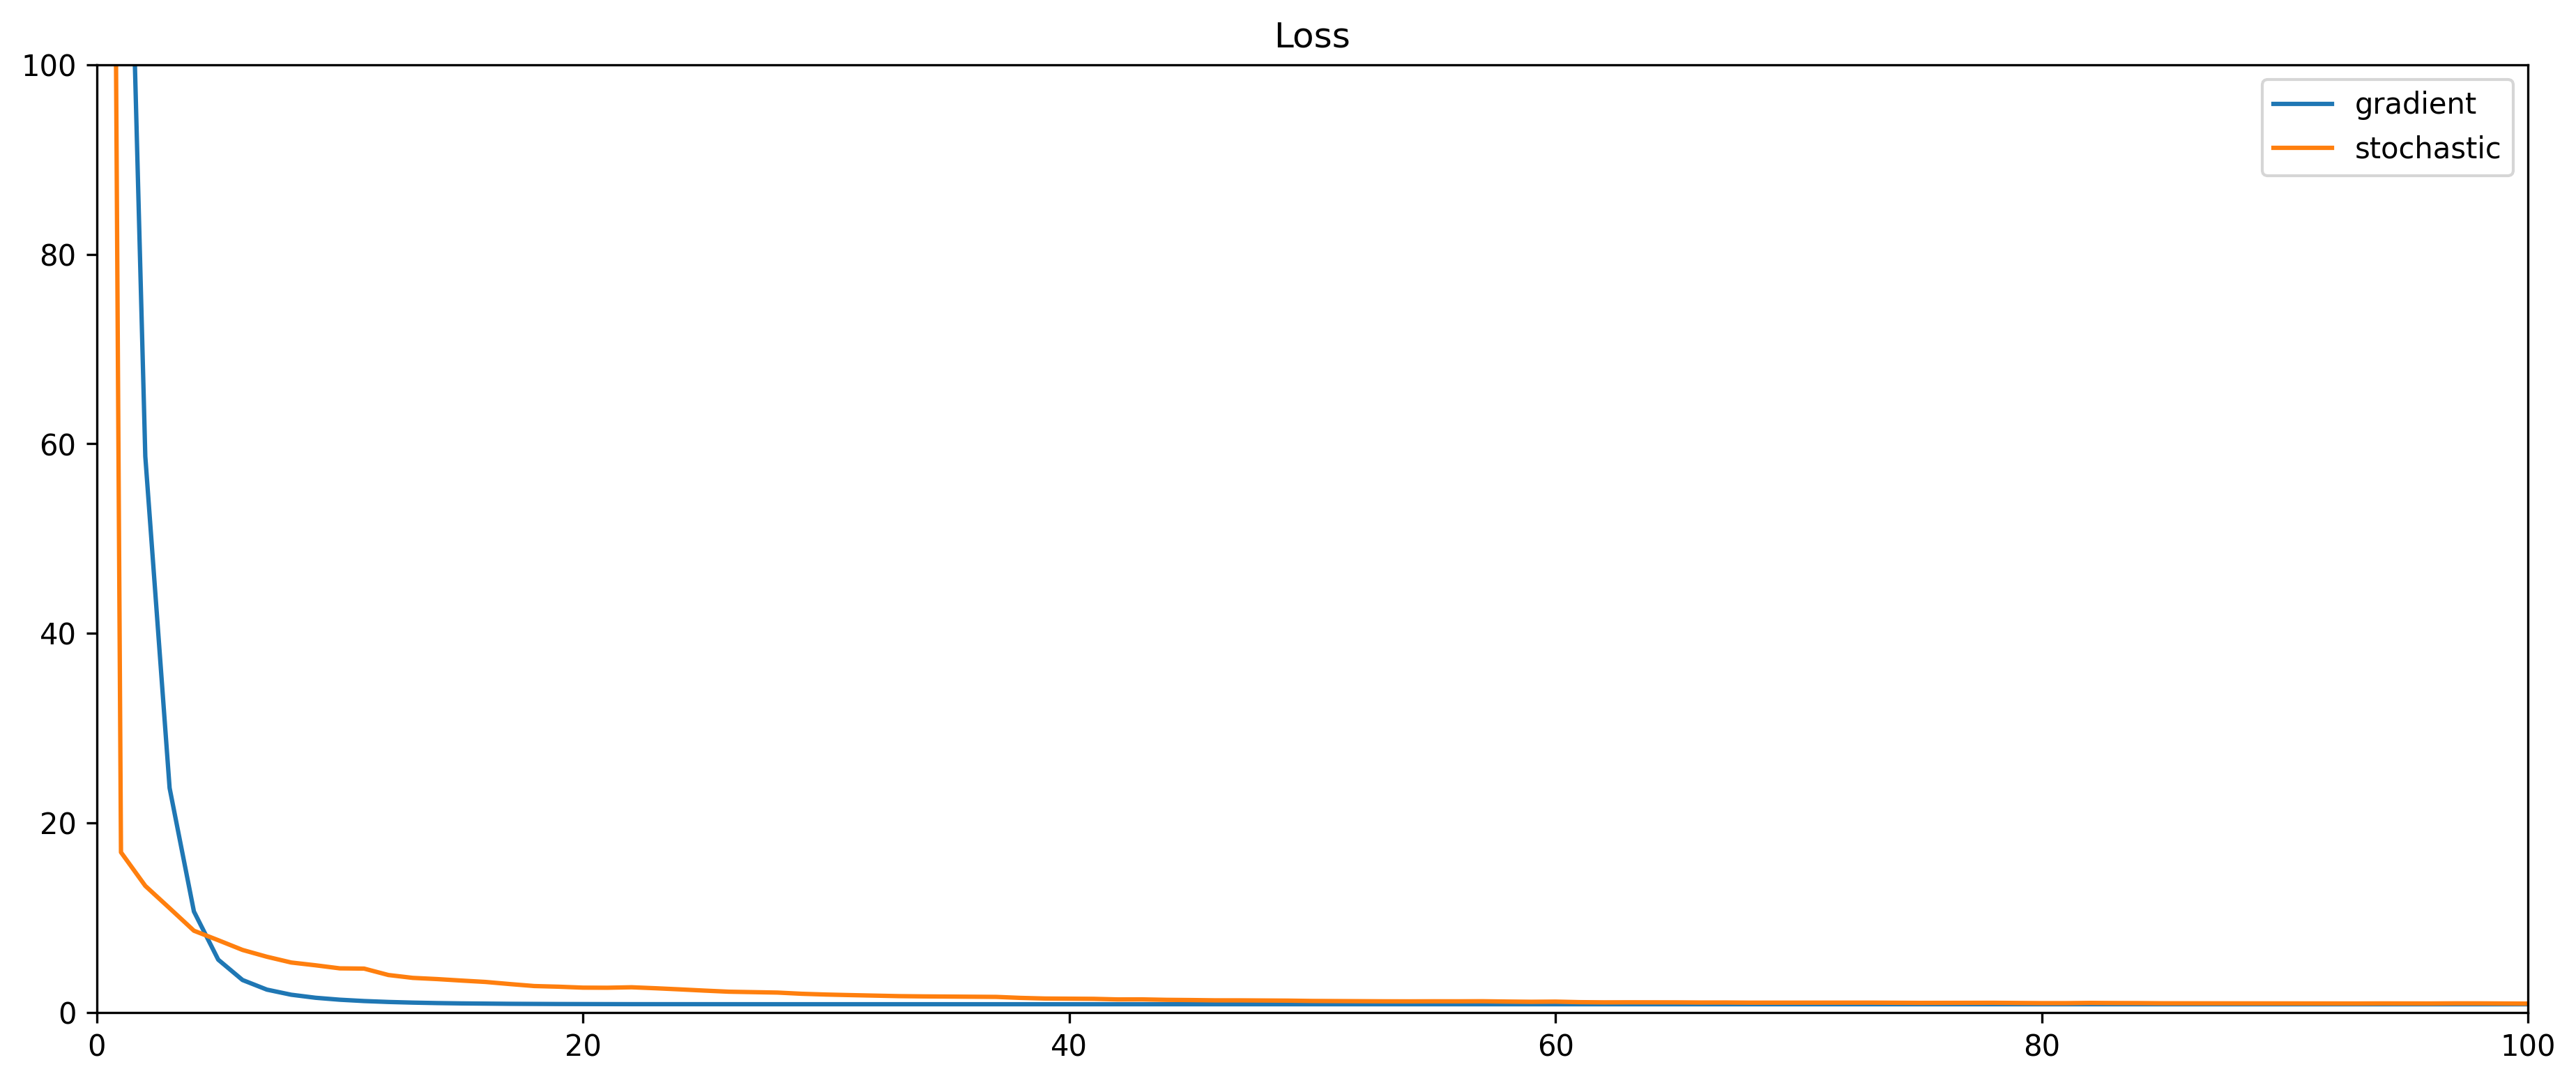

In [85]:
np.random.seed(110)
lr = 0.01
batch_size = 10
p = 0.5
n_iter = 500
loss_grad = []
loss_stoch = []
w_grad = gradient_descent(w_init, X, y, loss, lr, n_iter)
w_stoch = stochastic_gradient_descent(w_init, X, y, loss, lr, batch_size, p, n_iter)
for t in range(1, n_iter + 1):
    loss_grad.append(loss.calc_loss(X, y, w_grad[t - 1]))
    loss_stoch.append(loss.calc_loss(X, y, w_stoch[t - 1]))
plt.figure(figsize = (15, 6), dpi = 300)
plt.xlim(0, 100)
plt.ylim(0, 100)
plt.plot(loss_grad)
plt.plot(loss_stoch)
plt.title('Loss')
plt.legend(['gradient', 'stochastic']);

На данном графике не видно преимущества SGD, так как для стохастического градиентного спуска необходимо больше итерацией, чтобы достичь минимум. Однако каждая итерация будет считаться быстрее, потому что мы берем меньше объектов при расчете градиента.

Использование SGD может ускорить обучение и позволить быстрее сходиться к локальному минимуму, но его шумный характер может затруднить сходимость к оптимальному решению.
Обычный градиентный спуск может быть более стабильным и предсказуемым, но может потребовать больше времени для обучения на больших объемах данных.

## Часть 2. Линейная регрессия (5 баллов)

Теперь давайте напишем наш класс для линейной регрессии. Он будет использовать интерфейс, знакомый нам из библиотеки `sklearn`.

В методе `fit` мы будем подбирать веса `w` при помощи градиентного спуска нашим методом `gradient_descent`

В методе `predict` мы будем применять нашу регрессию к датасету, 

**Задание 2.1 (5/8 балла):** Допишите код в методах `fit` и `predict` класса `LinearRegression`

В методе `fit` вам нужно как-то инициализировать веса `w`, применить `gradient_descent` и сохранить последнюю `w` из траектории.

В методе `predict` вам нужно применить линейную регрессию и вернуть вектор ответов.

Обратите внимание, что объект лосса передаётся в момент инициализации и хранится в `self.loss`. Его нужно использовать в `fit` для `gradient_descent`.

In [89]:
class LinearRegression:
    def __init__(self, loss: BaseLoss, lr: float = 0.01) -> None:
        self.loss = loss
        self.lr = lr

    def fit(self, X: np.ndarray, y: np.ndarray) -> "LinearRegression":
        X = np.asarray(X)
        y = np.asarray(y)
        # Добавляем столбец из единиц для константного признака
        X = np.hstack([X, np.ones([X.shape[0], 1])])

        self.w = np.arange(X.shape[1])
        self.w = gradient_descent(self.w, X, y, self.loss, self.lr, 5000)[-1]

        return self

    def predict(self, X: np.ndarray) -> np.ndarray:
        # Проверяем, что регрессия обучена, то есть, что был вызван fit и в нём был установлен атрибут self.w
        assert hasattr(self, "w"), "Linear regression must be fitted first"
        # Добавляем столбец из единиц для константного признака
        X = np.hstack([X, np.ones([X.shape[0], 1])])
        return np.dot(X, self.w)

Теперь у нас есть наш класс линейной регрессии. Более того, мы можем управлять тем, какую функцию потерь мы оптимизируем, просто передавая разные классы в параметр `loss` при инициализации. 

Пока у нас нет никаких классов кроме `MSELoss`, но скоро они появятся.

Для `MSELoss` мы бы создавали наш объект линейной регрессии, например, так:

In [59]:
linear_regression = LinearRegression(MSELoss())

Применим нашу регрессию на реальном датасете. Загрузим датасет с машинами, который был у вас на семинарах:

In [91]:
import pandas as pd

X_raw = pd.read_csv(
    "http://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data",
    header=None,
    na_values=["?"],
)
# X_raw.head()
# X_raw = X_raw[~X_raw[25].isna()].reset_index()

In [92]:
X_raw

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114.0,5400.0,23,28,16845.0
201,-1,95.0,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160.0,5300.0,19,25,19045.0
202,-1,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134.0,5500.0,18,23,21485.0
203,-1,95.0,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106.0,4800.0,26,27,22470.0


In [93]:
y = X_raw[25]
X_raw = X_raw.drop(25, axis=1)

**Задание 2.2 (5/8 балла):** Как обычно обработайте датасет всеми нужными методами, чтобы на нём можно было обучать линейную регрессию:

* Разделите датасет на обучающую и тестовую выборку
* Заполните пропуски
* Нормализуйте числовые признаки
* Закодируйте категориальные переменные

In [94]:
from sklearn.model_selection import train_test_split
# разделите датасет на обучающую и тестовую выборку
X_train, X_test, y_train, y_test = train_test_split(X_raw, y, test_size=0.2, random_state=150) #3

In [95]:
# проверим есть ли пропуски 
print(X_train.isna().sum().sum())
print(X_test.isna().sum().sum())
print(y_train.isna().sum().sum())
print(y_test.isna().sum().sum())

43
12
3
1


Есть пропуски в данных, заполним их

In [96]:
from sklearn.impute import SimpleImputer
cat_features_mask = (X_train.dtypes == "object").values

# для вещественнозначных признаков заполним пропуски средними
X_real = X_train[X_train.columns[~cat_features_mask]]
mis_replacer = SimpleImputer(strategy="mean")
X_no_mis_real = pd.DataFrame(
    data=mis_replacer.fit_transform(X_real), columns=X_real.columns
)
# для категориальных - пустыми строками
X_cat = X_train[X_train.columns[cat_features_mask]].fillna("f").reset_index(drop=True)
X_train = pd.concat([X_no_mis_real, X_cat], axis=1)

In [97]:
cat_features_mask = (X_test.dtypes == "object").values
X_real = X_test[X_test.columns[~cat_features_mask]]
X_no_mis_real = pd.DataFrame(
    data=mis_replacer.transform(X_real), columns=X_real.columns
)
X_cat = X_test[X_test.columns[cat_features_mask]].fillna("").reset_index(drop=True)

X_test = pd.concat([X_no_mis_real, X_cat], axis=1)

mn = y_train.mean()
y_train = y_train.fillna(value=mn)
y_test = y_test.fillna(value=mn)

In [99]:
from sklearn.preprocessing import MinMaxScaler
num_features = X_train.select_dtypes(include='number').columns.tolist()
scaler = MinMaxScaler()
X_train[num_features] = scaler.fit_transform(X_train[num_features])
X_test[num_features] = scaler.transform(X_test[num_features])

In [100]:
from sklearn.preprocessing import OneHotEncoder
categorical_features = X_train.select_dtypes(include='object').columns.tolist()
encoder = OneHotEncoder(handle_unknown='ignore')
X_train_encoded = encoder.fit_transform(X_train[categorical_features]).toarray()
X_test_encoded = encoder.transform(X_test[categorical_features]).toarray()
X_train = pd.concat([X_train[num_features], pd.DataFrame(X_train_encoded)], axis=1)
X_test = pd.concat([X_test[num_features], pd.DataFrame(X_test_encoded)], axis=1)

In [101]:
X_train

,0,1,9,10,11,12,13,16,18,19,...,50,51,52,53,54,55,56,57,58,59
0,0.6,0.329843,0.230321,0.325984,0.190476,0.558333,0.087123,0.105469,0.373016,0.555556,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.2,0.157068,0.655977,0.696063,0.676190,0.641667,0.639184,0.292969,0.261905,0.611111,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,1.0,0.295385,0.271137,0.450394,0.428571,0.200000,0.513387,0.335938,0.722222,0.843434,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.4,0.136126,0.265306,0.341732,0.247619,0.433333,0.238844,0.156250,0.468254,0.585859,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.4,0.062827,0.265306,0.395276,0.171429,0.941667,0.240969,0.085938,0.293651,0.424242,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159,0.4,0.193717,0.309038,0.431496,0.342857,0.391667,0.202720,0.148438,0.746032,0.227273,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
160,0.4,0.214660,0.309038,0.453543,0.323810,0.575000,0.250319,0.195312,0.515873,0.646465,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
161,0.6,0.204188,0.189504,0.228346,0.228571,0.525000,0.075223,0.082031,0.277778,0.484848,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
162,0.6,0.434555,0.206997,0.200000,0.190476,0.233333,0.117297,0.078125,0.230159,0.525253,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


**Задание 2.3 (5/8 балла):** Обучите написанную вами линейную регрессию на обучающей выборке

In [110]:
linear_regression = LinearRegression(MSELoss())

In [111]:
linear_regression.fit(X_train, y_train);

**Задание 2.4 (5/8 балла):** Посчитайте ошибку обученной регрессии на обучающей и тестовой выборке при помощи метода `mean_squared_error` из `sklearn.metrics`.

In [112]:
from sklearn.metrics import mean_squared_error
print('MSE train:', mean_squared_error(y_train, linear_regression.predict(X_train)))
print('MSE test:', mean_squared_error(y_test, linear_regression.predict(X_test)))

MSE train: 3853128.134064305
MSE test: 5468078.923788718


Наша модель переобучилась. Давайте как обычно в такой ситуации добавим к ней L2 регуляризацию. Для этого нам нужно написать новый класс лосса.

Формула функции потерь для MSE с L2 регуляризацией выглядит так:
$$
Q(w, X, y) = \frac{1}{\ell} \sum\limits_{i=1}^\ell (\langle x_i, w \rangle - y_i)^2 + \lambda ||w||^2
$$

Или в матричном виде:

$$
Q(w, X, y) = \frac{1}{\ell} || Xw - y ||^2 + \lambda ||w||^2
$$

Где $\lambda$ — коэффициент регуляризации

Градиент выглядит так:

$$
\nabla_w Q(w, X, y) = \frac{2}{\ell} X^T(Xw-y) + 2 \lambda w
$$

**Задание 2.5 (5/8 балла):** Реализуйте класс `MSEL2Loss`

Он должен вычислять лосс и градиент по формулам наверху

Подсказка: обратите внимание, что последний элемент вектора `w` — это bias (в классе `LinearRegression` к матрице `X` добавляется колонка из единиц — константный признак). Как мы знаем из лекций и семинаров, bias регуляризовать не нужно. Поэтому не забудьте убрать последний элемент из `w` при подсчёте слагаемого $\lambda||w||^2$ в `calc_loss` и занулить его при подсчёте слагаемого $2 \lambda w$ в `calc_grad`

In [63]:
class MSEL2Loss(BaseLoss):
    def __init__(self, coef: float = 1.0):
        """
        :param coef: коэффициент регуляризации (лямбда в формуле)
        """
        self.coef = coef

    def calc_loss(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> float:
        """
        Функция для вычислений значения лосса
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета. Последний признак константный.
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии. Последний вес -- bias.
        :output: число -- значения функции потерь
        """
        n_objects = X.shape[0]
        mse = np.sum((np.dot(X, w) - y) ** 2)/n_objects
        regularization = self.coef * np.sum(w[:-1] ** 2)  # Регуляризация, без учёта bias
        return mse + regularization

    def calc_grad(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> np.ndarray:
        """
        Функция для вычислений градиента лосса по весам w
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :output: np.ndarray размера (n_features,) градиент функции потерь по весам w
        """
        n_objects = X.shape[0]
        gradient = 2 * np.dot(X.T, (np.dot(X, w) - y)) / n_objects
        regularization = 2 * self.coef * w[:-1]  # Градиент регуляризации, без учёта bias
        return gradient + np.append(regularization, 0)  # Добавляем 0 для bias

Теперь мы можем использовать лосс с l2 регуляризацией в нашей регрессии, например, так:

In [106]:
linear_regression = LinearRegression(MSEL2Loss(0.005))

**Задание 2.6 (5/8 балла):** Обучите регрессию с лоссом `MSEL2Loss`. Подберите хороший коэффициент регуляризации и добейтесь улучшения результата на тестовой выборке. Сравните результат на обучающей и тестовой выборке с регрессией без регуляризации. 

In [65]:
linear_regression.fit(X_train, y_train);

In [107]:
r = [0.001, 0.003, 0.005, 0.006, 0.007, 0.008]
for i in r:
    linear_regression = LinearRegression(MSEL2Loss(i))
    linear_regression.fit(X_train, y_train);
    print(i)
    print(mean_squared_error(y_train, linear_regression.predict(X_train)))
    print(mean_squared_error(y_test, linear_regression.predict(X_test)))

0.001
3966196.314060614
5420732.598503077
0.003
4199515.2723507695
5369818.041652883
0.005
4437536.750823761
5364431.393009078
0.006
4556918.876629611
5374926.392954902
0.007
4675991.87463445
5392547.561800593
0.008
4794430.54310077
5416252.238052029


In [113]:
# лучший результат при коэф = 0.05
linear_regression = LinearRegression(MSEL2Loss(0.005))
linear_regression.fit(X_train, y_train);
print('MSE train:', mean_squared_error(y_train, linear_regression.predict(X_train)))
print('MSE test:', mean_squared_error(y_test, linear_regression.predict(X_test)))

MSE train: 4437536.750823761
MSE test: 5364431.393009078


Ошибка на регрессии без регуляризации:    
MSE train: 3853128   
MSE test: 5468078

Получили более близкие ошибки на тренировочной и тестовой выборках и улучшился результат на тестовой выборке, таким образом, мы решили проблему переобучения. 

В нашем датасете могут быть выбросы. На семинаре вам рассказывали, что с выбросами хорошо помогает бороться Huber Loss. Вдали от нуля он работает как Mean Absolute Error и не реагирует на выбросы так сильно, как MSE. Давайте его реализуем и применим в нашей регрессии.

Напомним, что функция потерь Huber Loss'а  выглядит так:


$$
    Q(w, X, y) = \frac{1}{\ell} \sum\limits_{i=1}^\ell \phi_\varepsilon (\langle x_i, w \rangle - y_i)
$$
$$
    \phi_\varepsilon(z) = \begin{cases} \frac 1 2 z^2, - \varepsilon < z < \varepsilon, \\\varepsilon (|z| - \frac 1 2 \varepsilon), иначе \\ \end{cases}
$$


А градиент так:
$$
    \nabla_w Q(w, X, y) = \frac{1}{\ell} \sum\limits_{i=1}^\ell x_i \nabla_z \phi_\varepsilon (\langle x_i, w \rangle - y_i)
$$
$$
    \nabla_z \phi_\varepsilon(z) = \begin{cases} z, - \varepsilon < z < \varepsilon, \\\varepsilon \text{ sign}(z), иначе \\ \end{cases}
$$

**Задание 2.7 (5/8 балла):** Реализуйте класс `HuberLoss`

Он должен вычислять лосс и градиент по формулам наверху

In [115]:
class HuberLoss(BaseLoss):
    def __init__(self, eps: float) -> None:
        """
        :param eps: параметр huber loss из формулы
        """
        self.eps = eps

    def calc_loss(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> float:
        """
        Функция для вычислений значения лосса
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :output: число -- значения функции потерь
        """
        error = np.dot(X, w) - y
        absolute_error = np.abs(error)
        quadratic_loss = 0.5 * (error ** 2)
        linear_loss = self.eps * (absolute_error - 0.5 * self.eps)
        loss = np.where(absolute_error < self.eps, quadratic_loss, linear_loss)
        return np.mean(loss)

    def calc_grad(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> np.ndarray:
        """
        Функция для вычислений градиента лосса по весам w
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :output: np.ndarray размера (n_features,) градиент функции потерь по весам w
        """
        n_objects = X.shape[0]
        error = np.dot(X, w) - y
        absolute_error = np.abs(error)
        grad = np.sum(np.dot(X.T, np.where(absolute_error < self.eps, error, self.eps * np.sign(error)))) / n_objects
        return grad


**Задание 2.8 (5/8 балла):** Обучите регрессию с лоссом `HuberLoss`. Сравните результат на обучающей и тестовой выборке с регрессией, обученной c `MSELoss`.

In [120]:
linear_regression = LinearRegression(HuberLoss(3))
linear_regression.fit(X_train, y_train);
print('MSE train', mean_squared_error(y_train, linear_regression.predict(X_train)))
print('MSE test', mean_squared_error(y_test, linear_regression.predict(X_test)))

MSE train 61887165.84805617
MSE test 51942993.351001695


**Задание 3 (0.08/8 балла)**
Вставьте ваш любимый мем 2021 в ячейку ниже:

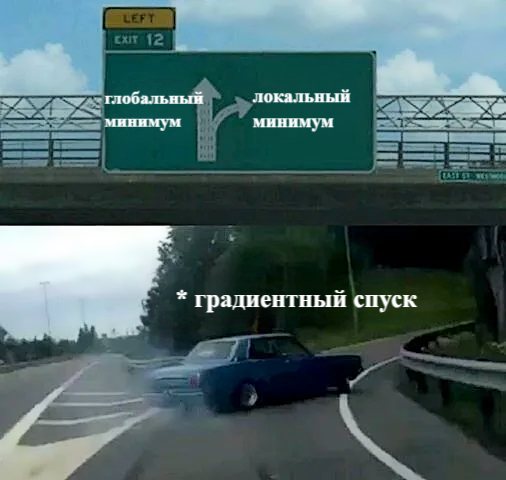

### БОНУС (2.5 баллов)

Градиентный спуск — далеко не единственный метод оптимизации. 
Другой очень известный метод называется ["Алгоритм имитации отжига"](https://ru.wikipedia.org/wiki/%D0%90%D0%BB%D0%B3%D0%BE%D1%80%D0%B8%D1%82%D0%BC_%D0%B8%D0%BC%D0%B8%D1%82%D0%B0%D1%86%D0%B8%D0%B8_%D0%BE%D1%82%D0%B6%D0%B8%D0%B3%D0%B0). Он не так часто используется для оптимизации моделей машинного обучения, но у вас есть уникальная возможность попробовать применить его к нашей любимой линейной регрессии.

**Задание (2.5 баллов)**:
Напишите алгоритм имитации отжига для оптимизации MSE линейной регрессии. 

Сравните результат с градиентным спуском по "траектории" и по финальному лоссу.

Подсказка: каждую новую точку (веса регресси в нашем случае) можно семплировать из некоторого случайного распределением с центром в текущей точке. Хорошо подойдут распределения с "тяжёлыми" хвостами, например, распределение Стьюдента с параметром количества степеней свободы в районе 3.
Это может выглядеть, например, так:
```
new_w = old_w + np.random.standard_t(3, size=old_w.shape)
```
С параметром распределения можно поэксперементировать: чем он больше, тем реже новые точки будут очень сильно уходить от старых.

In [118]:
np.random.seed(1337)

n_features = 2
n_objects = 300
batch_size = 10
num_steps = 43

w_true = np.random.normal(size=(n_features,))

X = np.random.uniform(-5, 5, (n_objects, n_features))
X *= (np.arange(n_features) * 2 + 1)[np.newaxis, :]
y = X.dot(w_true) + np.random.normal(0, 1, (n_objects))
w_init = np.random.uniform(-2, 2, (n_features))

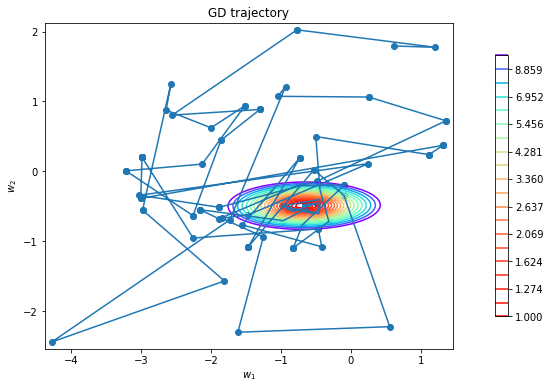

425.58917680450253
0.8901120969115559


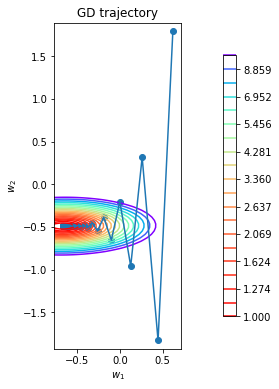

In [119]:
def simulated_annealing(X, y, initial_w, initial_temperature, cooling_rate, iterations, loss):
    """
    Функция имитации отжига для оптимизации MSE линейной регрессии.
    """
    current_temperature = initial_temperature
    current_w = initial_w
    best_w = initial_w
    best_error = loss.calc_loss(X, y, initial_w)
    weight_h = [current_w.copy()]

    for i in range(iterations):
        # Генерируем случайное изменение весов
        new_w = current_w + np.random.standard_t(3, size=current_w.shape)

        # Рассчитываем ошибку новых весов
        new_error = loss.calc_loss(X, y, new_w)

        # Принимаем новые веса с вероятностью, зависящей от температуры и изменения ошибки
        if new_error < best_error or np.random.rand() < np.exp((best_error - new_error) / current_temperature):
            current_w = new_w
            best_w = new_w
            best_error = new_error

        # Уменьшаем температуру
        current_temperature *= cooling_rate
        weight_h.append(best_w)

    return weight_h

np.random.seed(5)
loss = MSELoss()
initial_temperature = 1000
cooling_rate = 0.95
iterations = 1000

w_list = simulated_annealing(X, y, w_init, initial_temperature, cooling_rate, iterations, loss)
plot_gd(w_list, X, y, loss)
print(loss.calc_loss(X, y, w_list[0]))
print(loss.calc_loss(X, y, w_list[-1]))

w_list = gradient_descent(w_init, X, y, loss, lr, 500)
plot_gd(w_list, X, y, loss)

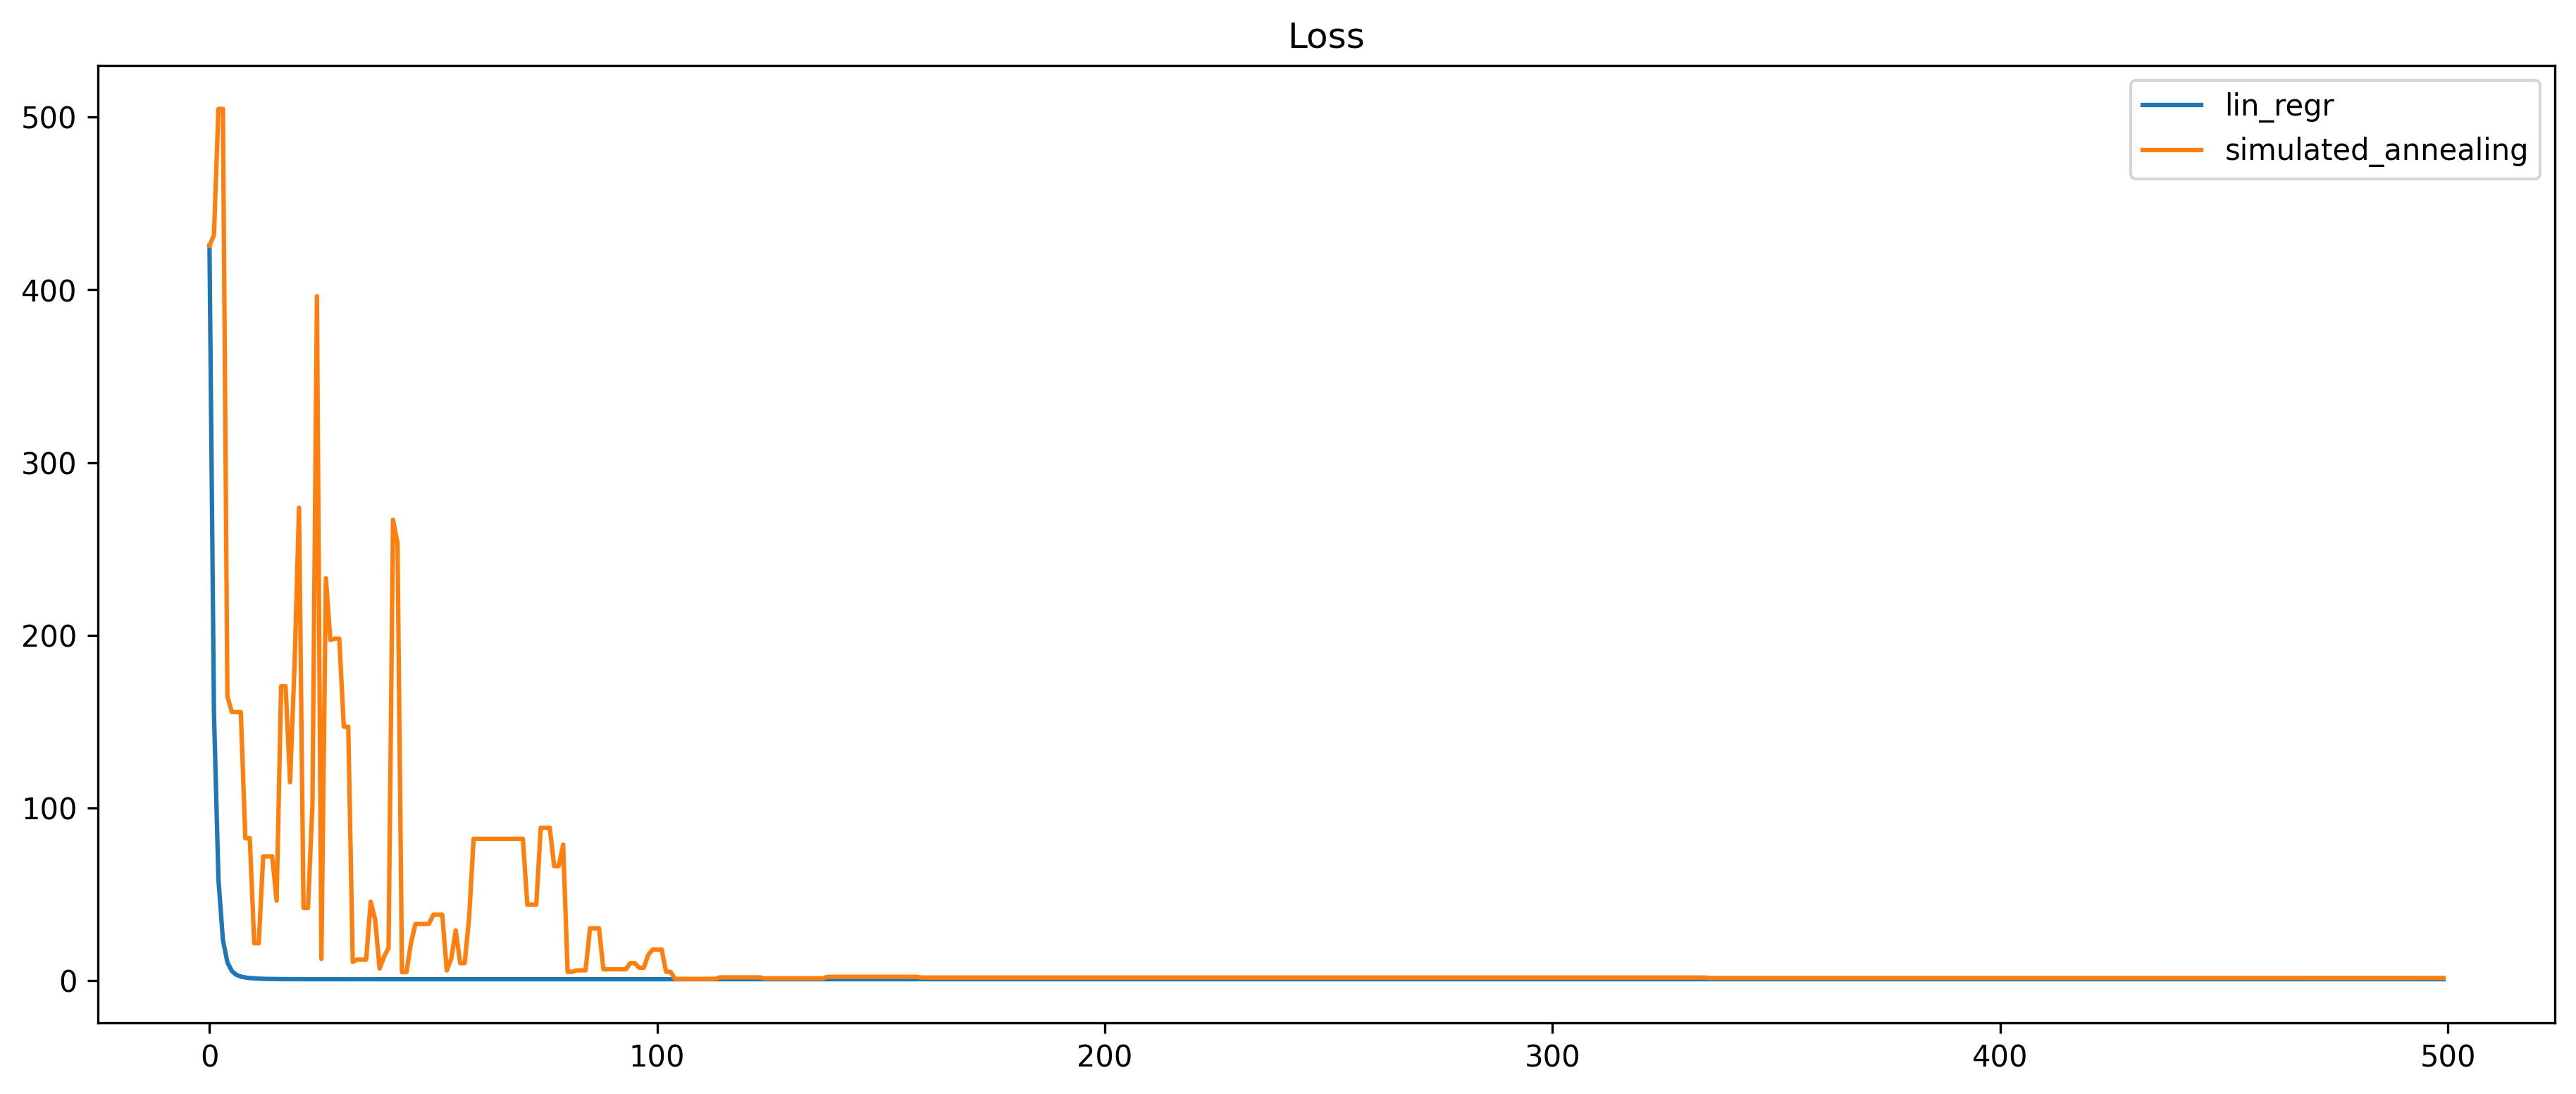

In [45]:
np.random.seed(5)
lr = 0.01
batch_size = 10
p = 0.5
n_iter = 500
loss_regr = []
loss_ann = []
w_grad = gradient_descent(w_init, X, y, loss, lr, n_iter)
w_ann = simulated_annealing(X, y, w_init, initial_temperature, cooling_rate, iterations, loss)
for t in range(1, n_iter + 1):
    loss_regr.append(loss.calc_loss(X, y, w_grad[t - 1]))
    loss_ann.append(loss.calc_loss(X, y, w_ann[t - 1]))
plt.figure(figsize = (15, 6), dpi = 300)
plt.plot(loss_regr)
plt.plot(loss_ann)
plt.title('Loss')
plt.legend(['lin_regr', 'simulated_annealing']);

Линейная регрессия более стабильная, предсказуемая и плавная, и ей необходимо меньшее количество итераций для нахождения минимума. Имитация отжига более зашумлен в силу случайного выбора и этому алгоритму необходимо значительно больше итераций, чтобы приблизится к минимуму, однако задачу поиска минимума он выполняет.